In [271]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [368]:
def ProposerSelection(vset):

#     // compute priorities and elect proposer
    Max_A = -10000

    for i in vset.keys():
        vset[i]['A'] += vset[i]['VP']
        if Max_A<vset[i]['A']:
            Max_A = vset[i]['A']
            Max_A_ID = i
    P = sum(vset[i]['VP'] for i in vset.keys())
    vset[Max_A_ID]['A'] -= P
    return Max_A_ID, vset
vset = {'p0':{'A':0,'VP':7},'p1':{'A':0,'VP':3},'p2':{'A':0,'VP':8}}

In [369]:
for i in range(18):
    Max_A_ID, vset = ProposerSelection(vset)
    print(Max_A_ID)
vset    

p2
p0
p1
p2
p0
p2
p0
p2
p0
p1
p2
p0
p2
p0
p2
p1
p0
p2


{'p0': {'A': 0, 'VP': 7}, 'p1': {'A': 0, 'VP': 3}, 'p2': {'A': 0, 'VP': 8}}

In [273]:
from scipy.stats import truncnorm
z = truncnorm.rvs(0, 1, size=100)

In [274]:
# plt.hist(z,bins=50)

In [275]:
N_validators = 10
VP_total = 1000
VP_precentage_1_validator = 0.4
def Simulation(N_validators,VP_total,VP_precentage_1_validator):
    VP_all =  truncnorm.rvs(0, 1, size=N_validators-1)
    VP_all_sum = sum(VP_all)
    VP_max = 1*VP_all_sum/(1-VP_precentage_1_validator) - VP_all_sum

    while (VP_max<max(VP_all)):
        VP_all =  truncnorm.rvs(0, 1, size=N_validators-1)
        VP_all_sum = sum(VP_all)
        VP_max = 1*VP_all_sum/(1-VP_precentage_1_validator) - VP_all_sum

    VP_all = np.append(VP_all,VP_max)
    VP_all_sum = sum(VP_all)
    # normalize
    for i in range(len(VP_all)):
        VP_all[i] = VP_all[i]/VP_all_sum
    # new VP
    for i in range(len(VP_all)):
        VP_all[i] = round(VP_all[i]*VP_total)
    # grnerate vset
    N_Vp = sum(VP_all)
    vset = {'0':{'A':0,'VP':VP_all[0]}}
    for i in range(1,len(VP_all)):
        vset[str(i)]= {'A':0,'VP':VP_all[i]}
    # generate series
    N_series = []
    for i in range(int(N_Vp)):
        d,vset = ProposerSelection(vset)
        N_series.append(d)
    
    # calculate validator wins
    Validator_subsequent_wins=[]
    for i in range(1,len(N_series)):
        if(N_series[i-1]==N_series[i]):
            Validator_subsequent_wins.append(N_series[i])
#             print(i)
#             print(N_series[i])
#             print(N_series[i-1])
#             print(N_series)
    return len(Validator_subsequent_wins)

In [396]:
# 5 hours
N_validators = 30 # N>100
VP_total = 1000
VP_precentage_1_validator = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
N_validators_maximum_VP_data = dict()
N_validators_and_VP_data = dict()
for N_validators in range(20,200,20):
    f = pd.DataFrame()
    Sum_subsequent_wins = 0
    for j in range(20,50,1):
        j = j/100
        z = []
        for i in range(10):
            z.append(Simulation(N_validators,VP_total,j))
        f[j] = z
        
        if sum(z)==0:
            Sum_subsequent_wins = j
    N_validators_and_VP_data[N_validators] = f
    N_validators_maximum_VP_data[N_validators] = Sum_subsequent_wins

## Get a graph of the dependence of the number of the subsequent wins on the corresponding maximum VP.

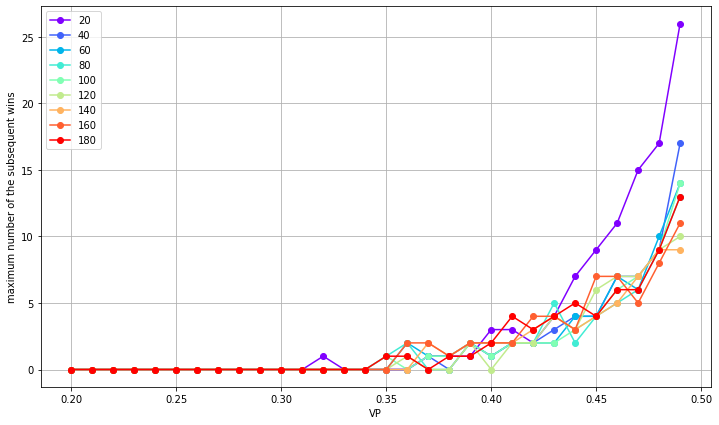

In [397]:
from matplotlib.pyplot import cm
plt.figure(figsize=(12, 7))
keys = N_validators_and_VP_data.keys() # all N_validators
color=iter(cm.rainbow(np.linspace(0,1,len(keys))))
for i in keys:
    c=next(color)
    plt.plot(N_validators_and_VP_data[i].max(), marker='o',c=c, label=i)
plt.xlabel("VP")
plt.ylabel("maximum number of the subsequent wins")
plt.legend()
plt.grid()    

## Get a graph of the dependence of the VP threshold on the number of validators.

[]

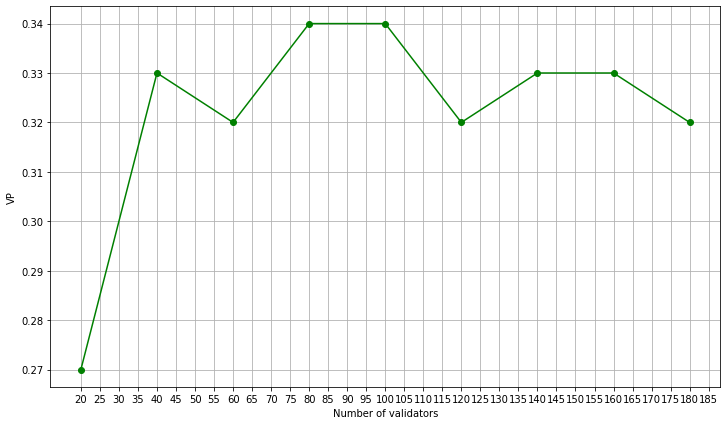

In [361]:
y_VP = []
x_N_validators = []
for i in N_validators_maximum_VP_data.keys():
    x_N_validators.append(int(i))
    y_VP.append(N_validators_maximum_VP_data[i])
plt.figure(figsize=(12, 7))
plt.plot(x_N_validators, y_VP, marker='o',c='g')
plt.xlabel("Number of validators")
plt.ylabel("VP")
plt.grid()
plt.xticks([i for i in range(20,200,5)])
plt.plot()

In [392]:
N_validators = 10
VP_total = 1000
VP_precentage_1_validator = 0.4
VP_all =  truncnorm.rvs(0, 1, size=N_validators-1)
VP_all_sum = sum(VP_all)
VP_max = 1*VP_all_sum/(1-VP_precentage_1_validator) - VP_all_sum

while (VP_max<max(VP_all)):
    VP_all =  truncnorm.rvs(0, 1, size=N_validators-1)
    VP_all_sum = sum(VP_all)
    VP_max = 1*VP_all_sum/(1-VP_precentage_1_validator) - VP_all_sum

VP_all = np.append(VP_all,VP_max)
VP_all_sum = sum(VP_all)
# normalize
for i in range(len(VP_all)):
    VP_all[i] = VP_all[i]/VP_all_sum
# new VP
for i in range(len(VP_all)):
    VP_all[i] = round(VP_all[i]*VP_total)
# grnerate vset
N_Vp = sum(VP_all)
vset = {'0':{'A':0,'VP':VP_all[0]}}
for i in range(1,len(VP_all)):
    vset[str(i)]= {'A':0,'VP':VP_all[i]}
# generate series
N_series = []
for i in range(int(N_Vp)):
    d,vset = ProposerSelection(vset)
    N_series.append(d)

# calculate validator wins
Validator_subsequent_wins=[]
for i in range(1,len(N_series)):
    if(N_series[i-1]==N_series[i]):
        Validator_subsequent_wins.append(N_series[i])
#             print(i)
#             print(N_series[i])
#             print(N_series[i-1])
#             print(N_series)
Validator_subsequent_wins

['9', '9', '9', '9']